In [3]:
!pip install -e .

Obtaining file:///Users/chandrasekharmukherjee/PycharmProjects/Lotus
  Preparing metadata (setup.py) ... done
  Attempting uninstall: lotus
    Found existing installation: lotus 0.1.0
    Not uninstalling lotus at /Users/chandrasekharmukherjee/PycharmProjects/Lotus, outside environment /Users/chandrasekharmukherjee/PycharmProjects/Lotus/.venv
    Can't uninstall 'lotus'. No files were found to uninstall.
  Running setup.py develop for lotus

[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [1]:
import lotus as lt
from lotus.workflows.preprocessing import preprocess
from lotus.workflows.core_analysis import core_analyze
from lotus.workflows.visualization import coremap
from lotus.methods.cplearn.external import cplearn

In [14]:
adata = lt.read('/Users/chandrasekharmukherjee/PycharmProjects/Personal/cplearn_biotest/NK_cells.h5ad')

Restoring from adata.raw for re-preprocessing...


/Users/chandrasekharmukherjee/PycharmProjects/Lotus/.venv/lib/python3.11/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  return fn(*args_all, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/Users/chandrasekharmukherjee/PycharmProjects/Lotus/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


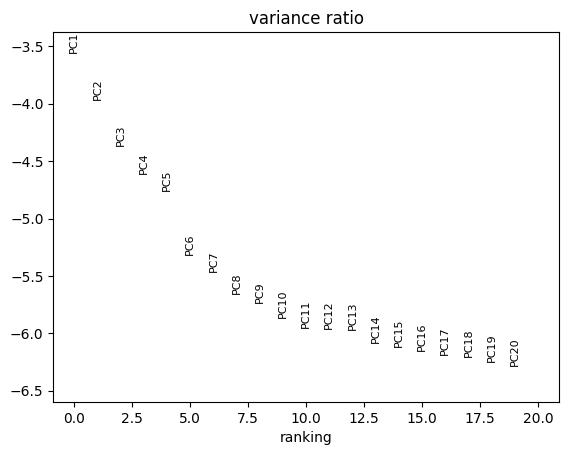

In [3]:
# 2. Preprocessing (same as standard workflow)
#preprocess(adata, n_pcs=20, n_top_genes=2000, n_neighbors=15, save_raw=True)

In [15]:
print(adata.obsm.values)

ValuesView(AxisArrays with keys: X_HARMONY, X_PCA, X_TSNE, X_UMAP)


In [16]:
model = cplearn.corespect(
    adata,
    use_rep="X_harmony",  # or "X_pca"
    key_added="cplearn",
    stable={"core_frac": 0.25, "ng_num": 8},
    cluster={"resolution": 1.2},
)

Initiating FlowRank with r= 10


/Users/chandrasekharmukherjee/PycharmProjects/Lotus/.venv/lib/python3.11/site-packages/cplearn/corespect/stable_core_utils.py:26: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  nbrs = adj_list[u]
/Users/chandrasekharmukherjee/PycharmProjects/Lotus/.venv/lib/python3.11/site-packages/cplearn/corespect/stable_core_utils.py:26: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  nbrs = adj_list[u]
/Users/chandrasekharmukherjee/PycharmProjects/Lotus/.venv/lib/python3.11/site-packages/cplearn/corespect/stable_core_utils.py:26: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  nbrs = adj_list[u]
/Users/chandrasekharmukherjee/PycharmProjects/Lotus/.venv/lib/python3.11/site-packages/cplearn/corespect/stable_core_utils.py:26: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  nbrs = adj_list[u]
/Users/chandrasekharmukherjee/PycharmProjects/Lotus/.venv/lib/python3.11

In [17]:
from cplearn.coremap import Coremap
cmap=Coremap(model,fast_view=True)
from cplearn.coremap.vizualizer import visualize_coremap

In [18]:
from cplearn.coremap.vizualizer import visualize_coremap
fig=visualize_coremap(cmap,model.labels_, use_webgl=True)
fig.show()

In [19]:
# 4. Compute core map embedding
core_analyze(
    adata,
    model=model,
    use_rep="X_latent",
    key_added="X_cplearn_coremap",
)

/Users/chandrasekharmukherjee/PycharmProjects/Lotus/lotus/workflows/core_analysis/__init__.py:67: UserWarning:

Neighbors graph not found. Please run preprocessing with neighbors() first, or use scanpy's sc.pp.neighbors() to compute neighbors graph.



Total number of clusters= 6
[4575, 4198, 2218, 2157, 1884, 1758]


Fitting GMM anchors: 100%|██████████| 6/6 [00:00<00:00, 28.19it/s]


GMM time=0.214 seconds (corrected)
Shape of embedding after round 0 is (16790, 2)
Shape of embedding after round 1 is (20550, 2)
Shape of embedding after round 2 is (24308, 2)
Shape of embedding after round 3 is (28066, 2)
Shape of embedding after round 4 is (31823, 2)
Shape of embedding after round 5 is (35578, 2)
Stored anchored map embedding in `adata.obsm['X_cplearn_coremap']` (35578/35578 points assigned).
Stored core layer information: `adata.obs['X_cplearn_coremap_is_core']` (16790/35578 core cells).
Using cluster labels from `adata.obs['cplearn']` for visualization.
Stored cplearn labels: `adata.obs['cplearn']` (7 clusters).


In [21]:
# 5. Visualization: Use coremap instead of UMAP
coremap(
    adata,
    model=model,
    coremap_key="X_cplearn_coremap",
    cluster_key="cplearn",
    output_dir="./results",
    save="_cplearn_coremap.html",
)

Saving coremap visualization to results/_cplearn_coremap.html
